In [111]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import glob
import os
import json as js



us_youtube_df = pd.read_csv('../data/USvideos.csv')
us_youtube_df.sample(5)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
12134,f3cpQZ5qvg4,18.15.01,Lena Waithe is Winning,Wendy Williams,24,2018-01-10T23:00:02.000Z,"#youtubeblack|""wendy williams""|""the wendy will...",102243,2225,167,417,https://i.ytimg.com/vi/f3cpQZ5qvg4/default.jpg,False,False,False,Lena Waithe tells us about her rise to fame an...
14359,3rIjcRK_BNU,18.26.01,Beat Saber Gameplay Teaser,Ján Ilavský,20,2018-01-20T10:38:16.000Z,"vr|""htc vive""|""oculus rift""|""sabers""|""neon""|""r...",954743,18884,273,1103,https://i.ytimg.com/vi/3rIjcRK_BNU/default.jpg,False,False,False,"Beat Saber is a unique VR rhythm game, where y..."
33833,iQp1_GfDhwQ,18.10.05,Jess Glynne - I'll Be There [Official Video],Jess Glynne,10,2018-05-04T09:30:15.000Z,"jess glynne|""jess""|""glynne""|""i'll be there""|""i...",1329185,38607,416,1405,https://i.ytimg.com/vi/iQp1_GfDhwQ/default.jpg,False,False,False,Get I'll Be There: http://ad.gt/illbethereSubs...
14441,VFnXRntc9XA,18.27.01,Jack White - Corporation (Audio),JackWhiteVEVO,10,2018-01-26T05:01:00.000Z,"Alternative|""Corporation""|""Jack White""|""Third ...",103116,5108,177,790,https://i.ytimg.com/vi/VFnXRntc9XA/default.jpg,False,False,False,“Corporation” by Jack White from the forthcomi...
24879,8uBP6UL-jEU,18.20.03,Black Panther New Scene - SNL,Saturday Night Live,24,2018-03-11T07:30:13.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",3745968,50925,5906,4557,https://i.ytimg.com/vi/8uBP6UL-jEU/default.jpg,False,False,False,"When T'Challa (Chris Redd) travels to Djalia, ..."


In [112]:
# Identify top 10 key influencers
# correlating publish time and views to determine most popular time for viewing content
# correlating/counting views, likes, dislikes, comments
# add csv for titles of youtube video id
us_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [113]:
#Who are the top 10 users based off likes.

sort_by_likes = us_youtube_df[['channel_title', 'likes']].sort_values('likes', ascending=False)
sort_by_likes.sample(10)


,channel_title,likes
18483,HellthyJunkFood,15817
3655,TheScriptVEVO,13066
26144,TBS,24862
38173,DALLMYD,41780
18744,LOL Network,142271
14999,Vevo,185646
18825,Simon's Cat,5412
13957,Techmoan,7378
39583,CNN,5616
32682,Primitive Survival Tool,15831


In [114]:
popular_by_likes = (
    sort_by_likes
        .groupby(by='channel_title')
        .sum()
        .sort_values(by='likes', ascending=False)
        .head(10)
    )
popular_by_likes


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


In [115]:
#Who are the top 10 users based off likes.

sort_by_views = us_youtube_df[['channel_title', 'views','likes']].groupby('channel_title').sum().sort_values(by='views', ascending=False).head(10)
sort_by_views

,views,likes
channel_title,,
ChildishGambinoVEVO,3758488765,96700818
ibighit,2235906679,199247121
Dude Perfect,1870085178,60275557
Marvel Entertainment,1808998971,55873344
ArianaGrandeVevo,1576959172,52170970
MalumaVEVO,1551515831,23278380
jypentertainment,1486972132,44900910
Sony Pictures Entertainment,1432374398,30106808
FoxStarHindi,1238609854,23762509


In [116]:
popular_by_views = (
    sort_by_views
        .groupby(by=['channel_title'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
popular_by_views



,views,likes
channel_title,,
ChildishGambinoVEVO,3758488765,96700818
ibighit,2235906679,199247121
Dude Perfect,1870085178,60275557
Marvel Entertainment,1808998971,55873344
ArianaGrandeVevo,1576959172,52170970
MalumaVEVO,1551515831,23278380
jypentertainment,1486972132,44900910
Sony Pictures Entertainment,1432374398,30106808
FoxStarHindi,1238609854,23762509


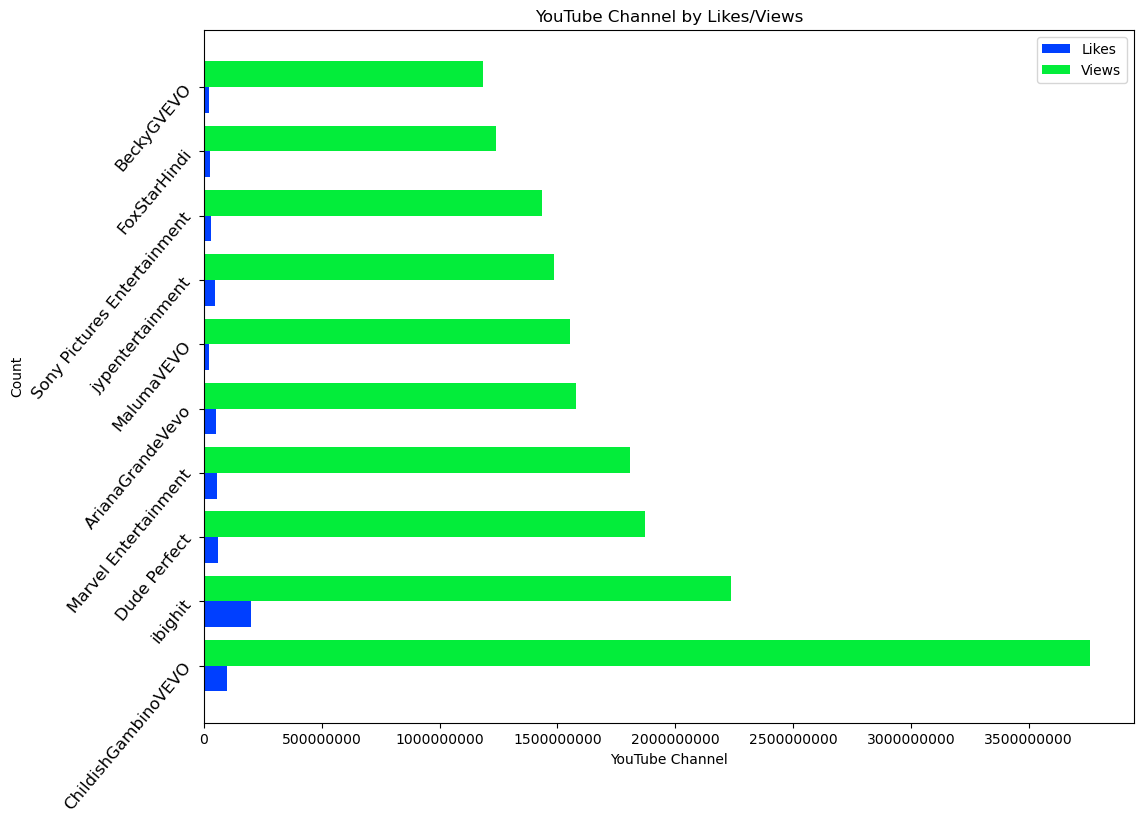

In [117]:
fig, ax = plt.subplots(figsize=(12,9))
likes = sort_by_views['likes']
views = sort_by_views['views']
chan_name = sort_by_views.index
  
chan_name_axis = np.arange(len(chan_name))
  
plt.barh(chan_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(chan_name_axis + 0.2, views, 0.4, label = 'Views')
plt.ticklabel_format(axis='x',style='plain')
#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
plt.yticks(chan_name_axis, chan_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("YouTube Channel")
plt.ylabel("Count")
plt.title("YouTube Channel by Likes/Views")
plt.legend()
plt.show()


In [118]:
#fig, ax = plt.subplots(figsize=(16,9))
#popular_by_likes = popular_by_likes.sort_values('likes', ascending=True)
#ax.barh(popular_by_likes.index, popular_by_likes['likes'])
#ax.set_title('YouTube Channel Popular by Likes', fontsize=18)
#ax.set_ylabel('YouTube Channel Title')
#ax.set_xlabel("Likes")
#ax.ticklabel_format(axis='x',style='plain')
#plt.savefig('../img/YouTube Channel Popular by Likes.jpg', bbox_inches = 'tight')
#plt.show()

In [119]:
#popular_by_views.plot(kind='barh')

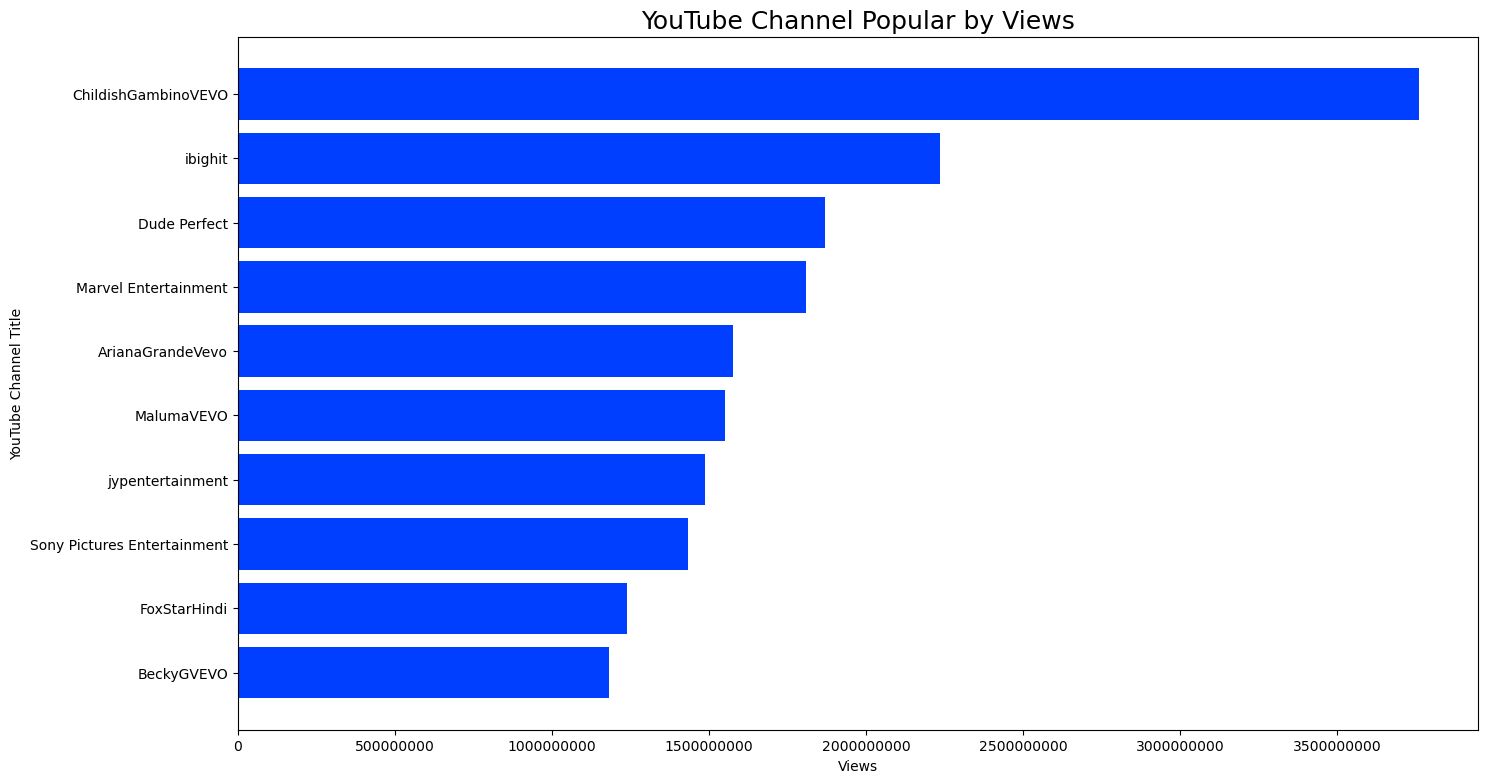

In [120]:
fig, ax = plt.subplots(figsize=(16,9))
popular_by_views = popular_by_views.sort_values('views', ascending=True)
ax.barh(popular_by_views.index, popular_by_views['views'])
ax.set_title('YouTube Channel Popular by Views', fontsize=18)
ax.set_ylabel('YouTube Channel Title')
ax.set_xlabel("Views")
ax.ticklabel_format(axis='x',style='plain')

plt.savefig('../img/YouTube Channel Popular by Views.jpg', bbox_inches = 'tight')
plt.show()

In [121]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-bright')


In [122]:
us_youtube_df['hour'] = pd.DatetimeIndex(us_youtube_df['publish_time']).hour
us_youtube_df['hour']
us_youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",7
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,18


In [123]:
us_youtube_df['hour'].sum()

563732

In [124]:
hour_corr = us_youtube_df[['views','likes','dislikes','hour']]
hour_corr.corr()

,views,likes,dislikes,hour
views,1.000000,0.849177,0.472213,-0.064916
likes,0.849177,1.000000,0.447186,-0.045296
dislikes,0.472213,0.447186,1.000000,-0.009750
hour,-0.064916,-0.045296,-0.009750,1.000000


In [125]:
views_times_corr = us_youtube_df.groupby(by='hour').sum()
views_times_corr.reset_index(inplace=True)
views_times_corr = views_times_corr[['views','likes','dislikes','comment_count','hour']]
views_times_corr


,views,likes,dislikes,comment_count,hour
0,2102430591,73069720,3493351,9796941,0
1,2608009982,74352959,4767974,8664745,1
2,1963268573,45572875,1324981,5331817,2
3,2722928516,68135410,3190260,6852700,3
4,9267508289,274128766,13279444,26177737,4
5,2987912716,105412432,4580425,9429649,5
6,871993900,17900061,867398,1543115,6
7,2903306925,65500127,2924998,5763321,7
8,2693147800,69970016,3587501,7430604,8
9,3477575589,160007663,4947730,27064292,9


<AxesSubplot:>

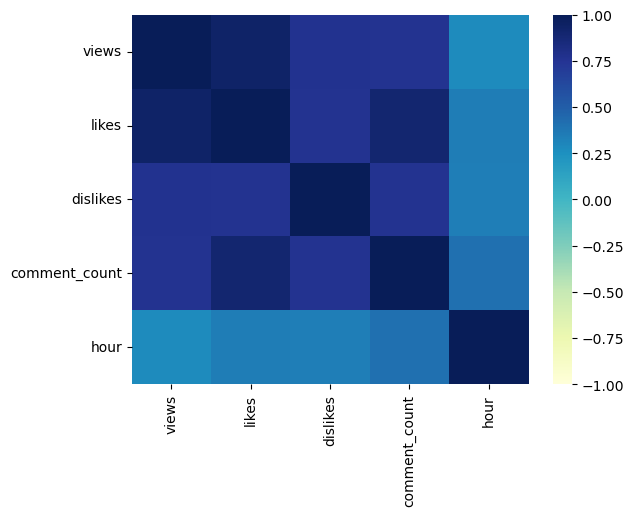

In [126]:
sns.heatmap(views_times_corr.corr(),vmin=-1,cmap='YlGnBu')

In [127]:
id_list = (
    us_youtube_df
        .groupby(by=['category_id'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )
id_list.reset_index(inplace=True)
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863


In [128]:
with open ('../data/US_category_id.json') as f:
    data = js.loads(f.read())
us_json_df = pd.json_normalize(data, record_path=['items'])
us_json_df

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [129]:
title_id = us_json_df[['id','snippet.title']].set_index('id')
title_id

,snippet.title
id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [130]:
title_id.index = title_id.index.astype('int64')
title_id_dict = title_id.to_dict()
title_id_dict['snippet.title']

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [131]:
id_list['category_id_name'] = id_list['category_id'].replace(title_id_dict['snippet.title'])
id_list

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


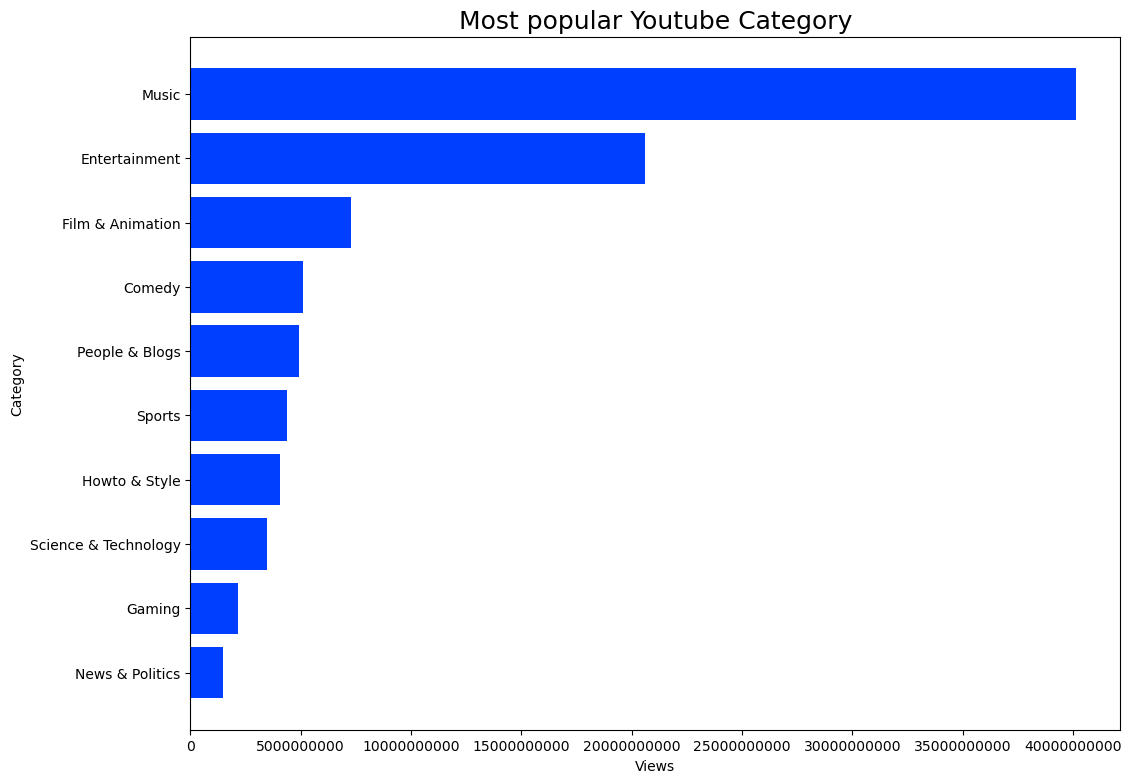

In [132]:
fig, ax = plt.subplots(figsize=(12,9))
id_list = id_list.sort_values('views', ascending=True)
ax.barh(id_list['category_id_name'], id_list['views'])
ax.set_title('Most popular Youtube Category', fontsize=18)
ax.set_ylabel('Category')
ax.set_xlabel('Views')
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/Most popular Youtube Category.jpg', bbox_inches = 'tight')
plt.show()

In [133]:
#id_list = id_list.set_index('category_id_name')
id_list.sort_values(by='views',ascending=False)
#top10_vs_category_name = popular_by_views.corr(id_list)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,hour,category_id_name
0,10,40132892190,1416838584,51179008,125296396,9,24,0,77816,Music
1,24,20604388195,530516491,42987663,73566498,196,30,8,138004,Entertainment
2,1,7284156721,165997476,6075148,17887060,28,14,13,34789,Film & Animation
3,23,5117426208,216346746,7230391,22545582,2,0,0,48511,Comedy
4,22,4917191726,186615999,10187901,24778032,66,37,0,44974,People & Blogs
5,17,4404456673,98621211,5133551,11192155,28,17,2,25805,Sports
6,26,4078545064,162880075,5473899,23149550,11,11,0,61154,Howto & Style
7,28,3487756816,82532638,4548402,11989926,90,16,0,34401,Science & Technology
8,20,2141218625,69038284,9184466,14740713,8,0,0,12207,Gaming
9,25,1473765704,18151033,4180049,6039433,174,1,0,34863,News & Politics


In [134]:
id_list_all_vars = id_list[[
                'category_id_name',
                'likes',
                'views',
                            ]]
id_list_all_vars = id_list_all_vars.set_index('category_id_name')
id_list_all_vars.sort_values(by='views',ascending=False)

,likes,views
category_id_name,,
Music,1416838584,40132892190
Entertainment,530516491,20604388195
Film & Animation,165997476,7284156721
Comedy,216346746,5117426208
People & Blogs,186615999,4917191726
Sports,98621211,4404456673
Howto & Style,162880075,4078545064
Science & Technology,82532638,3487756816
Gaming,69038284,2141218625


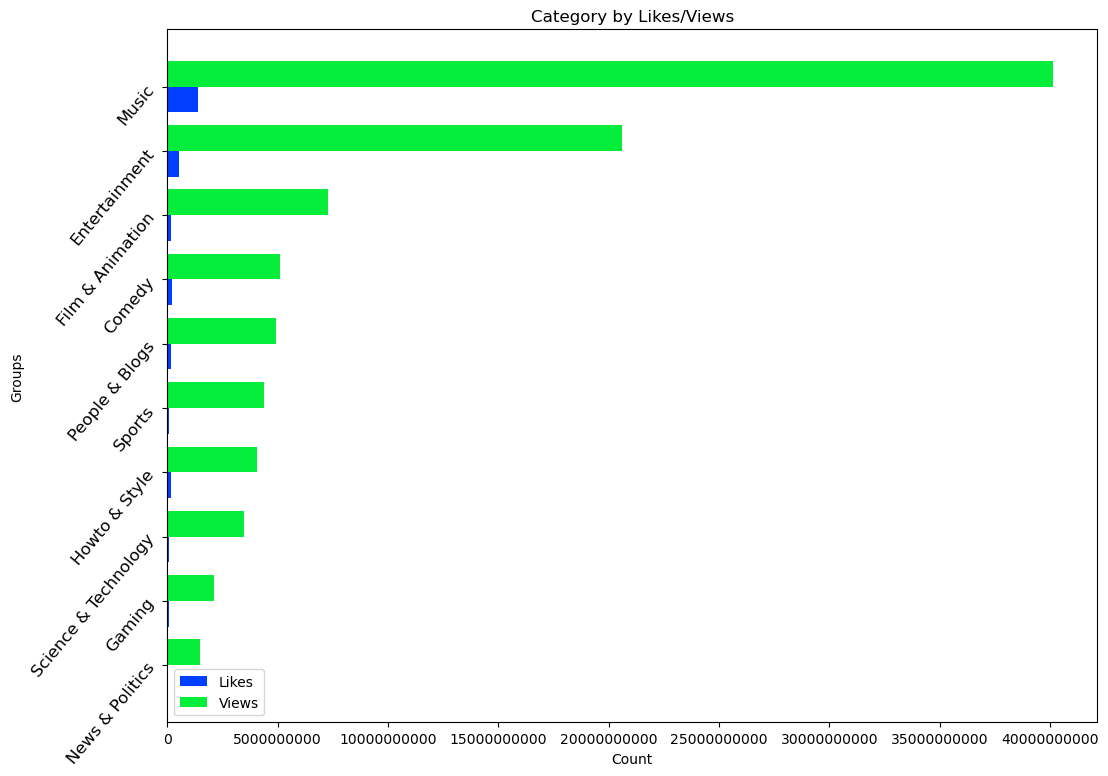

In [135]:
fig, ax = plt.subplots(figsize=(12,9))
likes = id_list_all_vars['likes']
views = id_list_all_vars['views']
cat_name = id_list_all_vars.index
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
cat_name_axis = np.arange(len(cat_name))
  
plt.barh(cat_name_axis - 0.2, likes, 0.4, label = 'Likes')
plt.barh(cat_name_axis + 0.2, views, 0.4, label = 'Views')

#ax.set_xticklabels(cat_name, rotation=60, horizontalalignment='right', fontsize='12')
ax.ticklabel_format(axis='x',style='plain')
plt.yticks(cat_name_axis, cat_name, rotation=50, horizontalalignment='right', fontsize='12')
plt.xlabel("Count")
plt.ylabel("Groups")
plt.title("Category by Likes/Views")
plt.legend()
plt.show()

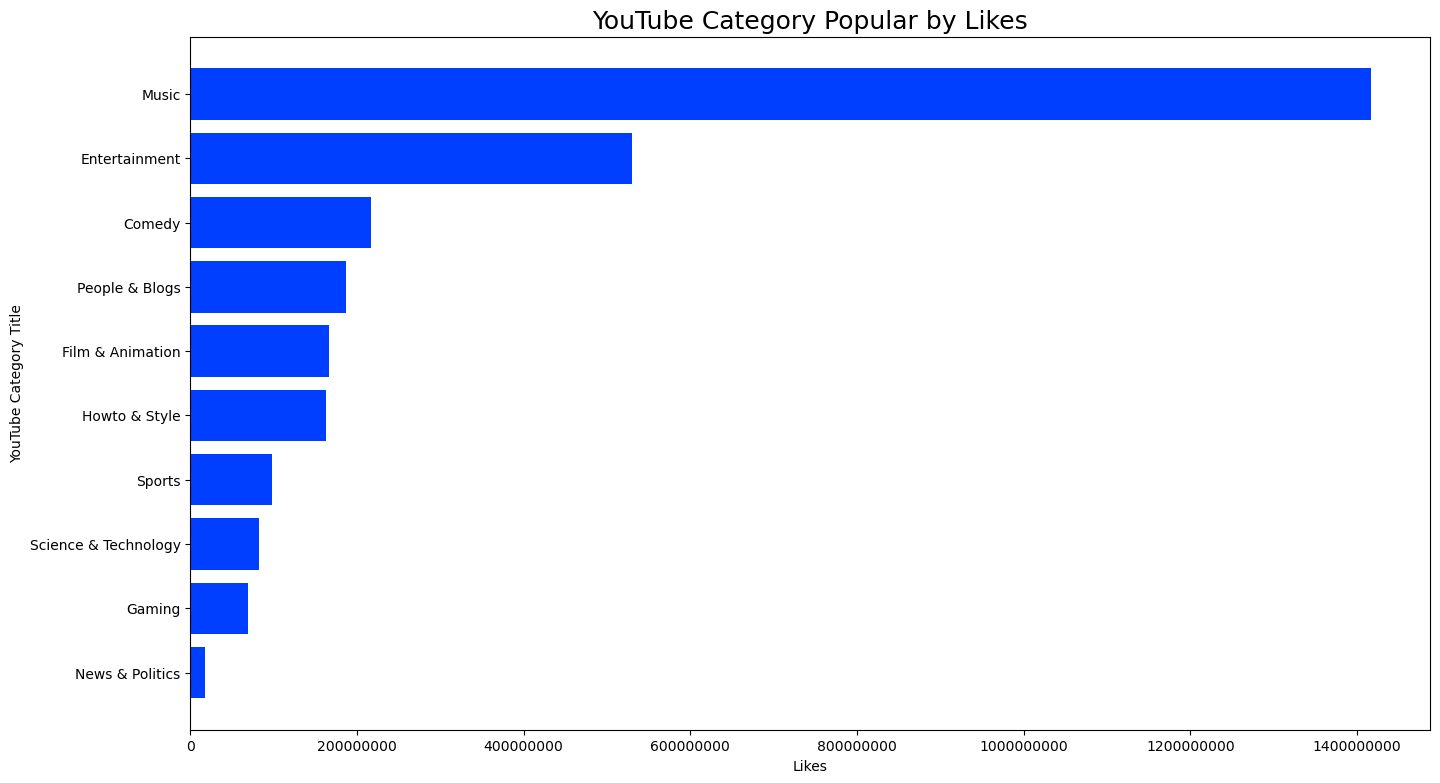

In [136]:
fig, ax = plt.subplots(figsize=(16,9))
id_list_all_vars = id_list_all_vars.sort_values('likes', ascending=True)
ax.barh(id_list_all_vars.index, id_list_all_vars['likes'])
ax.set_title('YouTube Category Popular by Likes', fontsize=18)
ax.set_ylabel('YouTube Category Title',)
ax.set_xlabel("Likes")
ax.ticklabel_format(axis='x',style='plain')
plt.savefig('../img/YouTube Category Popular by Likes.jpg', bbox_inches = 'tight')
plt.show()